# Explore here

In [146]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_idd = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")




In [147]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Connection = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_idd, client_secret=client_secret))

In [148]:
Artist_id = '6XyY86QOPPrYVGvF9ch6wz'

results = Connection.artist_top_tracks(Artist_id)
print(results)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6XyY86QOPPrYVGvF9ch6wz'}, 'href': 'https://api.spotify.com/v1/artists/6XyY86QOPPrYVGvF9ch6wz', 'id': '6XyY86QOPPrYVGvF9ch6wz', 'name': 'Linkin Park', 'type': 'artist', 'uri': 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV

In [149]:
if results:
    tracks = results['tracks']

tracks = [{k:(v/(1000*60)%60) if k == 'duration_ms' else v for k,v in track.items() if k in ['name', 'duration_ms', 'popularity']} for track in tracks]
# if results
#   for track in results['tracks'][:10]:
#       print('track    : ' + track['name'])
#       print('cover art: ' + track['album']['images'][0]['url'])
#       print('release da
print(tracks)


[{'duration_ms': 3.173783333333333, 'name': 'The Emptiness Machine', 'popularity': 83}, {'duration_ms': 3.6146666666666665, 'name': 'In the End', 'popularity': 86}, {'duration_ms': 3.1253333333333333, 'name': 'Numb', 'popularity': 86}, {'duration_ms': 2.783533333333333, 'name': 'Heavy Is the Crown', 'popularity': 80}, {'duration_ms': 2.701766666666667, 'name': 'Faint', 'popularity': 82}, {'duration_ms': 2.6222166666666666, 'name': 'One Step Closer', 'popularity': 82}, {'duration_ms': 3.4204333333333334, 'name': "What I've Done", 'popularity': 80}, {'duration_ms': 3.0597333333333334, 'name': 'Two Faced', 'popularity': 78}, {'duration_ms': 3.56555, 'name': 'Somewhere I Belong', 'popularity': 69}, {'duration_ms': 3.0811, 'name': 'Papercut', 'popularity': 77}]


In [150]:
#otra forma de sacar la información
tracks2 = []

for track in tracks:
    for k,v in track.items():
        if k == 'name':
            tracks2.append(v)
        if k == 'duration_ms':
            tracks2.append(v)
        if k == 'popularity':
            tracks2.append(v)  

print(tracks2)

[3.173783333333333, 'The Emptiness Machine', 83, 3.6146666666666665, 'In the End', 86, 3.1253333333333333, 'Numb', 86, 2.783533333333333, 'Heavy Is the Crown', 80, 2.701766666666667, 'Faint', 82, 2.6222166666666666, 'One Step Closer', 82, 3.4204333333333334, "What I've Done", 80, 3.0597333333333334, 'Two Faced', 78, 3.56555, 'Somewhere I Belong', 69, 3.0811, 'Papercut', 77]


In [151]:
#haremos un dataframeeeeee

tracks_df = pd.DataFrame.from_records(tracks)
print(tracks_df)



   duration_ms                   name  popularity
0     3.173783  The Emptiness Machine          83
1     3.614667             In the End          86
2     3.125333                   Numb          86
3     2.783533     Heavy Is the Crown          80
4     2.701767                  Faint          82
5     2.622217        One Step Closer          82
6     3.420433         What I've Done          80
7     3.059733              Two Faced          78
8     3.565550     Somewhere I Belong          69
9     3.081100               Papercut          77


In [152]:
#para organizar por popularidad las canciones
tracks_df = tracks_df.sort_values(by='popularity', ascending=False)
tracks_df

,duration_ms,name,popularity
1,3.614667,In the End,86
2,3.125333,Numb,86
0,3.173783,The Emptiness Machine,83
4,2.701767,Faint,82
5,2.622217,One Step Closer,82
3,2.783533,Heavy Is the Crown,80
6,3.420433,What I've Done,80
7,3.059733,Two Faced,78
9,3.081100,Papercut,77
8,3.565550,Somewhere I Belong,69


In [153]:
tracks_df.head(3)

,duration_ms,name,popularity
1,3.614667,In the End,86
2,3.125333,Numb,86
0,3.173783,The Emptiness Machine,83


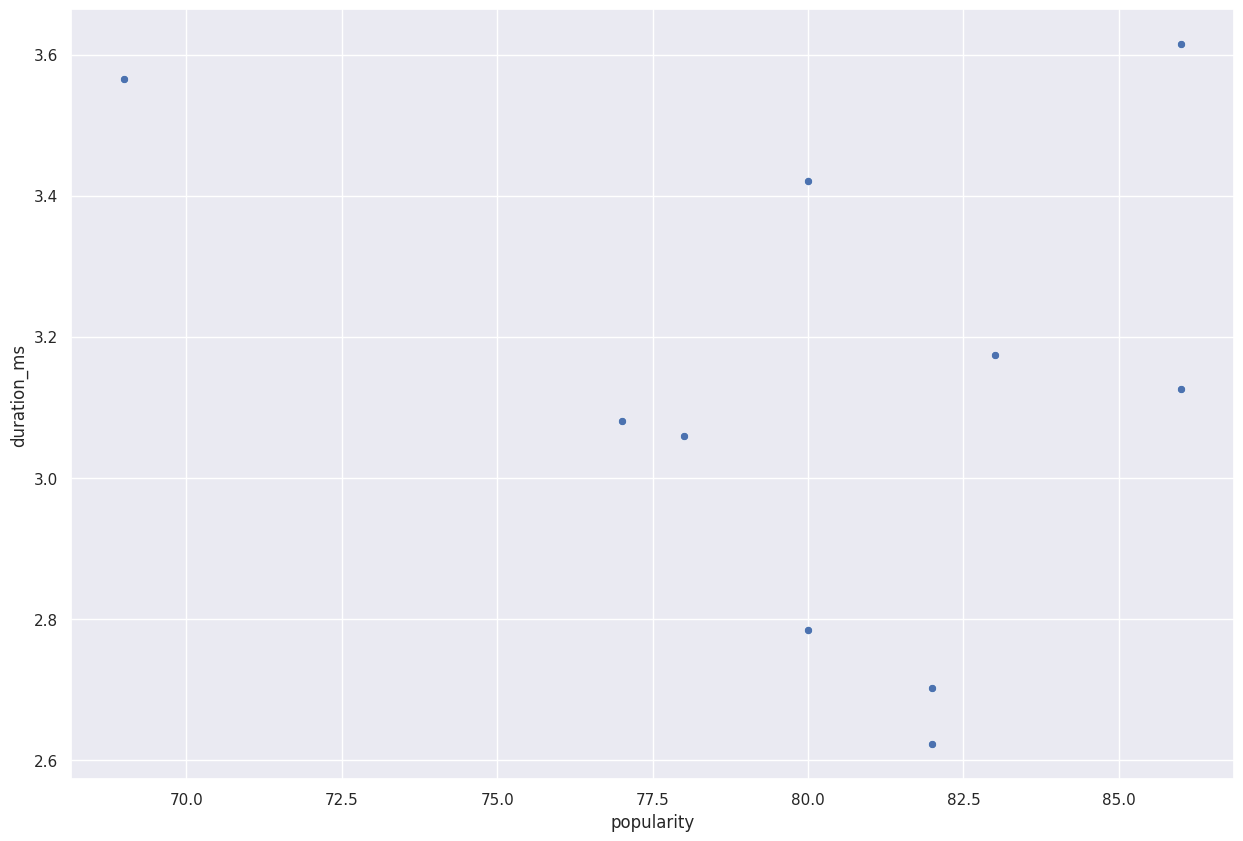

In [156]:
#Para hacer un scatterplot de popularidad y duración
sns.scatterplot(data=tracks_df, x='popularity', y='duration_ms')
sns.set(rc={'figure.figsize':(10,6)})
